# **Time Series - Using TimeGPT**

### ***Import Libraries and Setting API key for TimeGPT***

In [63]:
import pandas as pd

In [64]:
from nixtlats import NixtlaClient
nixtla_client = NixtlaClient(api_key ='Fill you API here')


In [65]:
nixtla_client.validate_api_key()

True

In [66]:
df = pd.read_csv('UNRATE.csv')
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


### ***Plots***

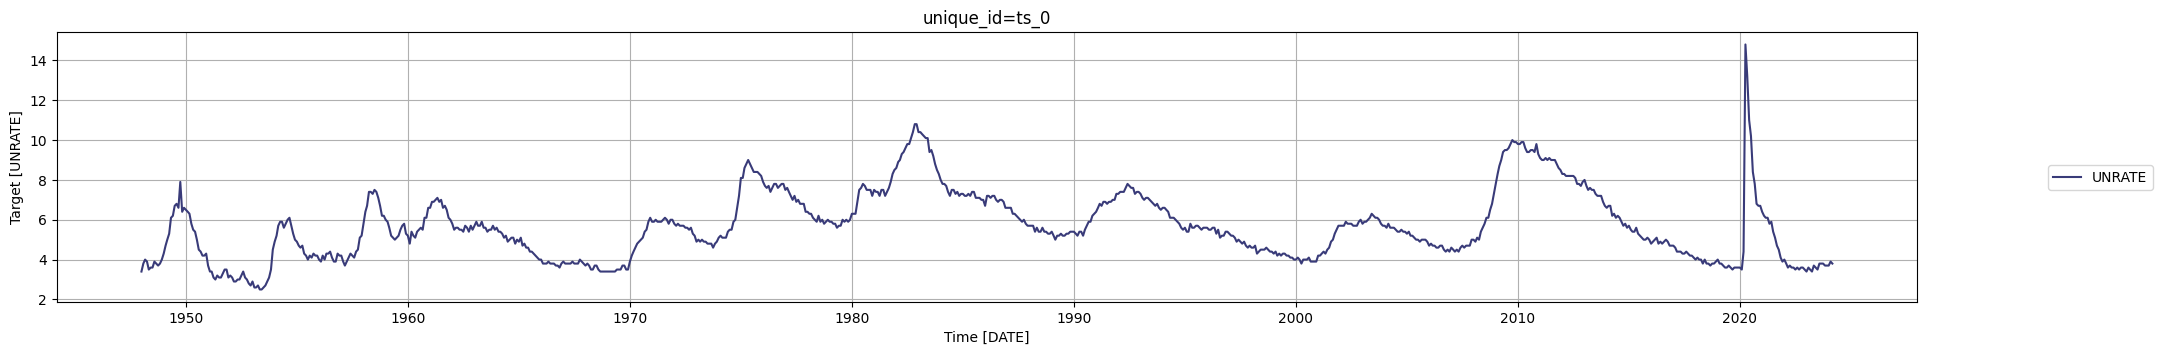

In [67]:
nixtla_client.plot(df, time_col='DATE', target_col='UNRATE')

### ***Fine tuning on our dataset***

**Splitting the Dataset**

In [68]:
#Splitting
train = df[:-36]
test = df[-36:]

train['ds'] = train['DATE']
train['y'] = train['UNRATE']

<ipython-input-68-92dfb3f555ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = train['DATE']
<ipython-input-68-92dfb3f555ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = train['UNRATE']


**Fitting the Model**

In [69]:
#Predictions
test = test.copy()
preds_df = nixtla_client.forecast(df=train,
    h=36,
    finetune_steps=10,
    finetune_loss='default',
    time_col='timestamp',
    target_col='value')

**Prediction**

In [70]:
preds = preds_df['TimeGPT'].values
preds_df.head(3)

,timestamp,TimeGPT
0,2021-04-01,5.795289
1,2021-05-01,5.748605
2,2021-06-01,5.655069


In [71]:
test.head(3)

,DATE,UNRATE
879,2021-04-01,6.1
880,2021-05-01,5.8
881,2021-06-01,5.9


In [72]:
# Merge based on the 'DATE' column
preds_df = preds_df.rename(columns={'timestamp': 'DATE'})
#preds_df = preds_df.rename(columns={'TimeGPT': 'UNRATE'})


**Evaluation**

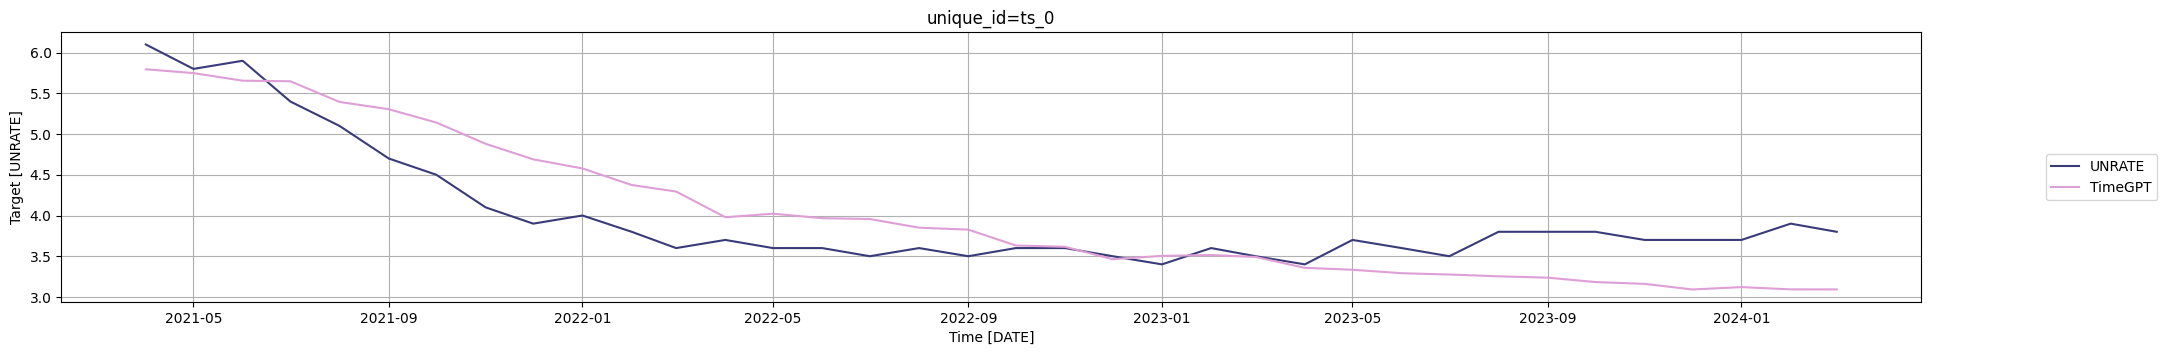

In [73]:
nixtla_client.plot(test,preds_df, time_col='DATE', target_col='UNRATE')

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['UNRATE'], preds_df['TimeGPT']))

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.4617688660802126


### ***Future Forecasting***

In [75]:

timegpt_future_df = nixtla_client.forecast(df=df, h=31, freq='MS', time_col='DATE', target_col='UNRATE')
timegpt_future_df.head()

,DATE,TimeGPT
0,2024-04-01,3.770537
1,2024-05-01,3.823031
2,2024-06-01,3.791026
3,2024-07-01,3.746803
4,2024-08-01,3.821868


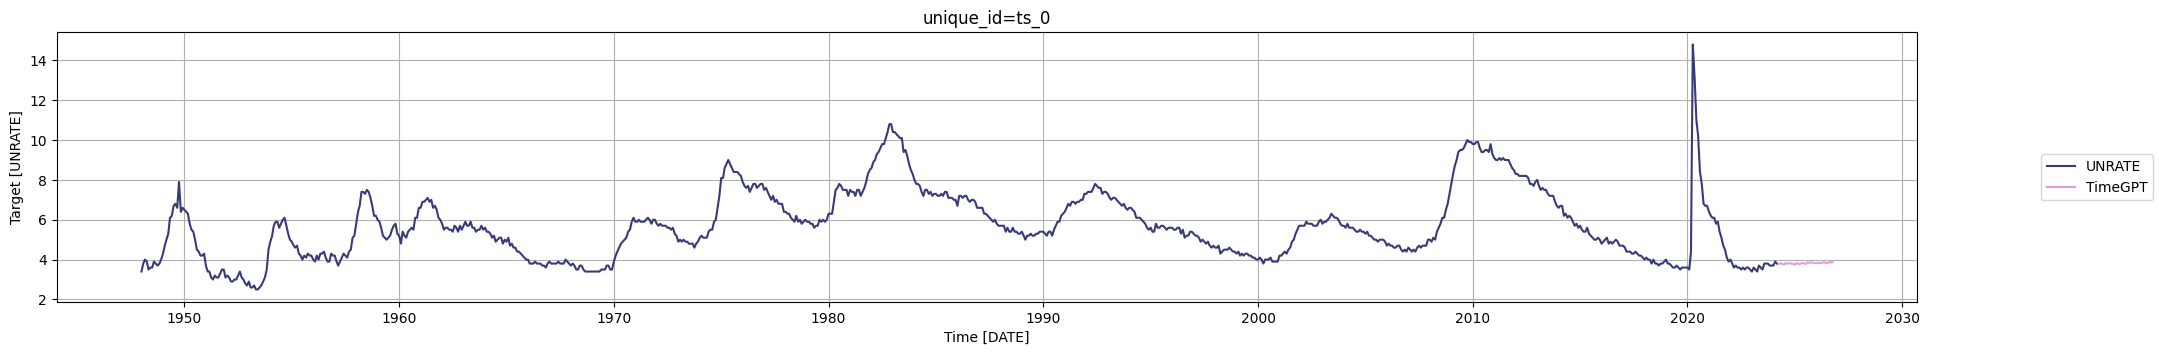

In [76]:
nixtla_client.plot(df, timegpt_future_df, time_col='DATE', target_col='UNRATE')

### ***Conclusion***

An RMSE (Root Mean Squared Error) of 0.46 indicates that the Time GPT model performs exceptionally well in predicting the target variable compared to other models such as AR (AutoRegressive), MA (Moving Average), ARIMA, LSTM, and Prophet.